In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import optimize 
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split
import matplotlib.colors as pltcolors
from sklearn import metrics

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [8]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native.country'] = df['native.country'].replace('?', np.nan)

In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
df.dropna(how='any', inplace=True)

In [12]:
df.shape

(30162, 15)

In [13]:
df.duplicated().sum()

23

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.describe(exclude='number')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30139,30139,30139,30139,30139,30139,30139,30139,30139
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22264,9834,14059,4034,12457,25912,20366,27487,22633


In [17]:
df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [18]:
df['education.num'].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 11,  2,  3, 12,  8,  5,  1],
      dtype=int64)

In [19]:
df = df.drop(['education'], axis=1)

In [20]:
#Because there are more than 75 percent values are zero in these two columns. Drop them.
df = df.drop(['capital.gain', 'capital.loss'], axis=1)

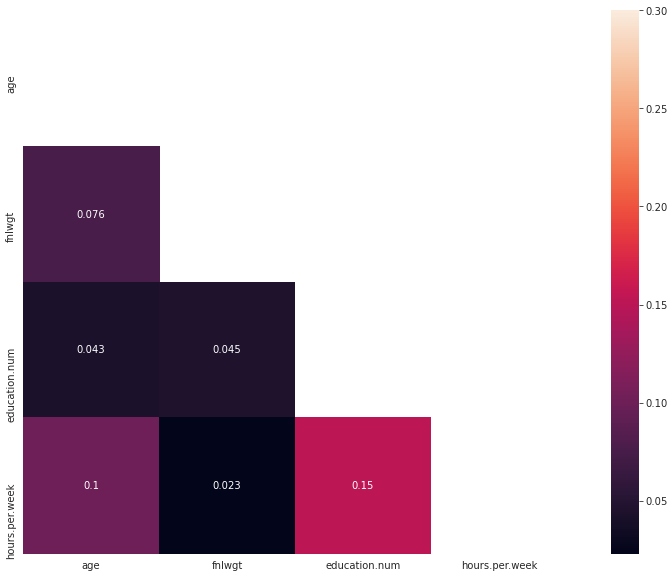

In [21]:
# Correlation between variables
corr = df.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True) # , annot=True

<AxesSubplot:>

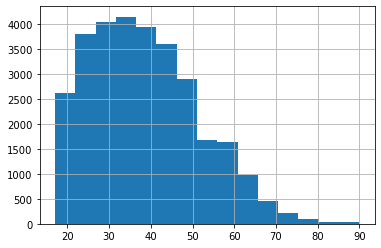

In [22]:
df['age'].hist(bins=15)

<AxesSubplot:>

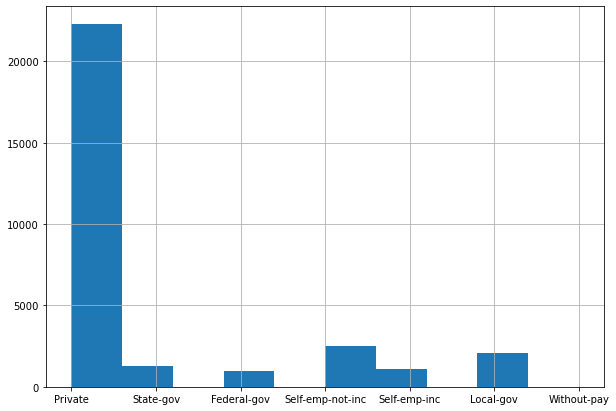

In [23]:
plt.figure(figsize=(10,7))
df['workclass'].hist()

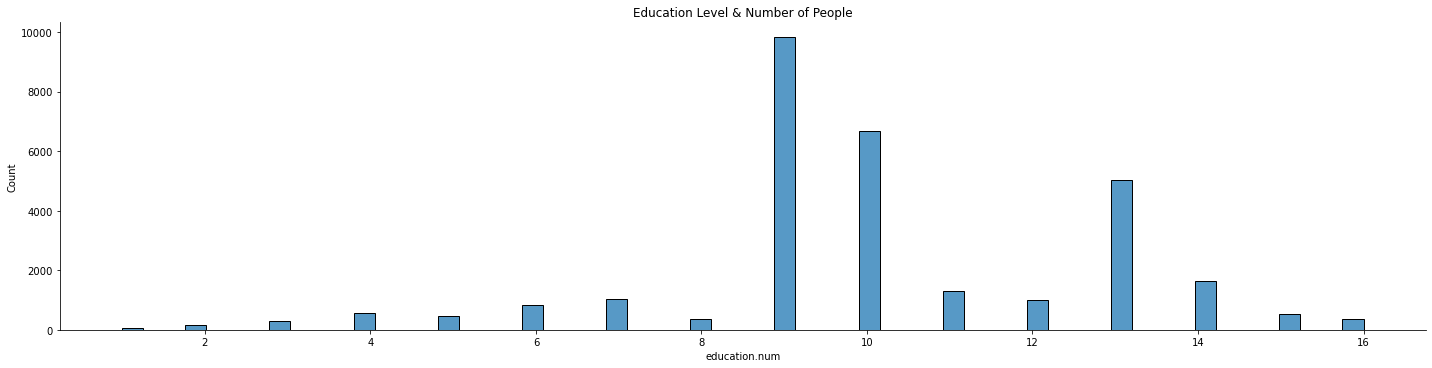

In [24]:
sns.displot(x=df['education.num'], aspect=4)
plt.title('Education Level & Number of People')
plt.show()

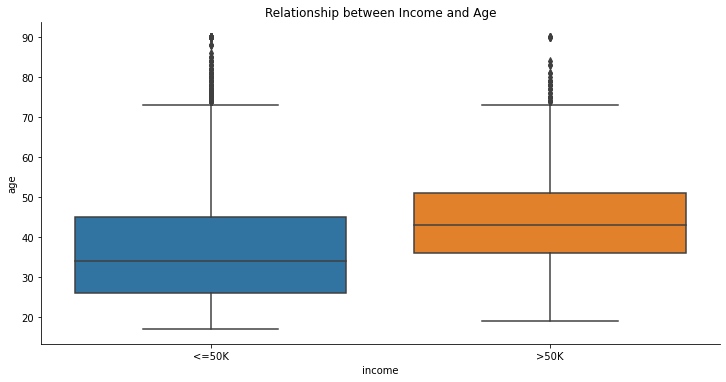

In [25]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

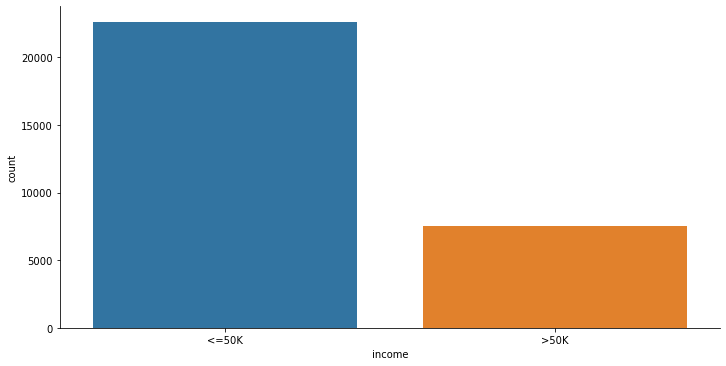

In [26]:
sns.catplot(data=df, x='income', kind= 'count', aspect=2)

Scaling and Encoding

In [27]:
scaler = MinMaxScaler()
df1 = df.copy()

In [28]:
def income_one_hot(col):
    
    if col == '<=50K':
        
        return 1
    
    else:
        
        return 0
    
df1['<=50K'] = df['income'].apply(income_one_hot)
df1.drop('income', axis = 1, inplace = True)

In [29]:
def Encoding(col):
    
    if col == 'White':
        
        return 1
    
    else:
        
        return 0
    
def Encoding_black(col):
    
    if col == 'Black':
        
        return 1
    
    else:
        
        return 0
    
df1['white'] = df['race'].apply(Encoding)
df1['black'] =  df['race'].apply(Encoding_black)
df1.drop(['race'], axis = 1, inplace = True)

In [30]:
df1['sex'] = pd.get_dummies(df['sex'], drop_first = True)

In [31]:
df1 = df1.join(pd.get_dummies(df['marital.status'], drop_first = True))
df1.drop('marital.status', axis = 1, inplace = True)
#df1.drop('fnlwgt', axis = 1, inplace = True)
#df1.drop('sex', axis = 1, inplace = True)
#df1.drop('white', axis = 1, inplace = True)
#df1.drop('black', axis = 1, inplace = True)
#df1.drop('education.num', axis = 1, inplace = True)

In [32]:
df1 = df1.join(pd.get_dummies(pd.get_dummies(df['occupation'], drop_first = True)))
df1.drop('occupation', axis = 1, inplace = True)

In [33]:
df1 = df1.join(pd.get_dummies(pd.get_dummies(df['relationship'], drop_first = True)))
df1.drop('relationship', axis = 1, inplace = True)

In [34]:
df1 = df1.join(pd.get_dummies(pd.get_dummies(df['workclass'],prefix = 'workclass_', drop_first = True)))
df1.drop('workclass', axis = 1, inplace = True)

In [35]:
df1.drop('native.country', axis = 1, inplace = True)
df1.drop('fnlwgt', axis = 1, inplace = True)

In [36]:
from scipy import optimize 
import seaborn as sns 
from svm_utils import *

In [37]:
df1 = df1.drop_duplicates()

**Split Data**

In [38]:
X = df1.loc[:, df1.columns!= '<=50K']
#X = df1
y = df1['<=50K']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.01)
X_train

,age,education.num,sex,hours.per.week,white,black,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,Other-relative,Own-child,Unmarried,Wife,workclass__Local-gov,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,workclass__State-gov,workclass__Without-pay
8708,41,9,0,38,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6753,40,9,1,40,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2242,63,10,1,45,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4216,20,7,1,20,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
14156,19,10,0,15,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,46,4,1,40,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
20184,26,13,1,15,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
8289,45,9,0,15,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5097,56,9,1,55,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
df3 = df.copy()
df3

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [41]:
df3.drop('marital.status', axis = 1, inplace = True)
df3.drop('fnlwgt', axis = 1, inplace = True)
df3.drop('sex', axis = 1, inplace = True)
df3.drop('native.country', axis = 1, inplace = True)
df3.drop('relationship', axis = 1, inplace = True)
df3.drop('occupation', axis = 1, inplace = True)
df3.drop('workclass', axis = 1, inplace = True)
df3.drop('race', axis = 1, inplace = True)
df3['<=50K'] = df['income'].apply(income_one_hot)
df3.drop('income', axis = 1, inplace = True)
df3

,age,education.num,hours.per.week,<=50K
1,82,9,18,1
3,54,4,40,1
4,41,10,40,1
5,34,9,45,1
6,38,6,40,1
...,...,...,...,...
32556,22,10,40,1
32557,27,12,38,1
32558,40,9,40,0
32559,58,9,40,1


In [42]:
C = df3.loc[:, df3.columns!= '<=50K']
#X = df1
D = df3['<=50K']

In [43]:
C_train, C_test, D_train, D_test = train_test_split(C, D, train_size = 0.01)
C_test

,age,education.num,hours.per.week
22580,30,9,45
5043,23,9,40
10621,52,6,30
6,38,6,40
4252,56,13,40
...,...,...,...
17334,27,14,40
29921,35,9,40
21303,59,13,60
32510,33,6,40


In [44]:
xTrain = pd.DataFrame(C_train).to_numpy()
#yTrain = pd.DataFrame(y_train).to_array()
yTrain = D_train.values.ravel()
#xTrain

**SVM**

In [45]:
class MaxMarginClassifier:
    
    def __init__(self, C):
        self.alpha = None
        self.w = None
        self.b = None
        self.supportVectors= None
        self.C = C
    
    def fit(self, X, y):
        N = len(y)
        Xy = X*y[:, np.newaxis]
        GramXy = np.matmul(Xy, Xy.T)
        
        def Ld0(G, alpha):
            obj_fun = alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))
            return obj_fun
    
        def parialDerivationLde(G, alpha):
            par_der = np.ones_like(alpha)- alpha.dot(G)
            return par_der
    
        alpha = np.ones(N)
    
        A= np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C*np.ones(N)))
    
        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
                     
        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                 x0 = alpha,
                                 method ='SLSQP',
                                 jac= lambda a: - parialDerivationLde(GramXy,a),
                                 constraints = constraints)
        self.alpha = optRes.x
    
        self.w= np.sum((self.alpha[:, np.newaxis]* Xy), axis = 0)
    
        epsilon = 1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]
    
        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
        
        self.b = sum(b)/len(b)
    
    def predict(self, X):
        X = X.values
        return 2 * (np.matmul(X, self.w) + self.b > 0) - 1
    
    

In [46]:
model =MaxMarginClassifier(C=5)

In [47]:
model.fit(xTrain, yTrain)

In [48]:
model.alpha.shape

(301,)

In [49]:
model.b

2.170952977376135e-08

In [50]:
model.w

array([-2.18924666e-10, -2.20578474e-10, -2.09011198e-10])

In [94]:
#fig, ax = plt.subplots(1, figsize = (12, 7)) 
#plotSvm(xTrain, yTrain, model.supportVectors, model.w, model.b, label = 'training', ax = ax)

In [88]:
svm_result = model.predict(C_test)
svm_result

array([ 1,  1,  1, ..., -1,  1, -1])

In [92]:
predictions = np.where(svm_result == -1, 0, svm_result)
assert len(predictions) == len(C_test), "Unequal arrays"
identity = sum([p == y for p, y in zip(predictions, D_test)]) / len(predictions) * 100
identity

72.28366512500838

LogisticRegression

In [54]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [55]:
class LogisticRegression():
    def __init__(self, X, y, learningRate,tolerance,maxIteration = 1000):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
    
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y.T)# Negative log likelihood function
        cost = pred_.sum()
        
        return cost
    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)#number of gradient is features
        
        return grad
    
    def gradientDescent(self,X,y):
        
        cost_sequence = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w-self.learningRate*self.gradient(X,y)
            
            cur_cost = self.costFunction(X,y)
            diff = last_cost - cur_cost
            last_cost - cur_cost
            cost_sequence.append(cur_cost)
            # add patience for the loop
            if diff<self.tolerance:
                print('The model Stopped - Converged')
                break
        self.plotCost(cost_sequence)
        return
          
    def predict(self,X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
        
    def predictProb(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return pred
    
    def evaluate(self,y,y_hat):
        accuracy=0
        precision=0
        recall=0
        y = (y==1)
        y_hat = (y_hat ==1)
        accuracy = (y==y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        return accuracy,precision,recall
    
    def remove_index(self,index):
        x_train = np.delete(self.X_train,index,0)
        y_train = np.delete(self.y_train,index,0)
        return x_train,y_train
    
    def runModel(self):
        self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.X, self.y, train_size = 0.1)
        print('solving using gradient descent')
        self.w = np.ones(self.X_train.shape[1],dtype = np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
        
        print(self.w)
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall = self.evaluate(self.y_train,y_hat_train)
        print('Evaluation for training data:\n')
        print('Accuracy:',accuracy)
        print('Precision:',precision)
        print('Recall:',recall)
        
    
    def plotCost(self, error_sequence):
        s = np.array(error_sequence)
        t = np.arange(s.size)
        #index = range(1,len(error_sequence)+1)
        f, ax = plt.subplots(figsize=(14,12))
        plt.plot(t, s)
        plt.xlabel('iteration')
        plt.ylabel('RMSE')
        plt.suptitle('Cost')
        plt.show()    
        
    def plot(self):
        plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]D:\Anacondapy\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-55-49097f162e2f>:35: RuntimeWarning: invalid value encountered in double_scalars
  diff = last_cost - cur_cost
<ipython-input-55-49097f162e2f>:36: RuntimeWarning: invalid value encountered in double_scalars
  last_cost - cur_cost
  1%|▋                                                                             | 88/10000 [00:00<00:22, 438.51it/s]

solving using gradient descent


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:21<00:00, 468.24it/s]


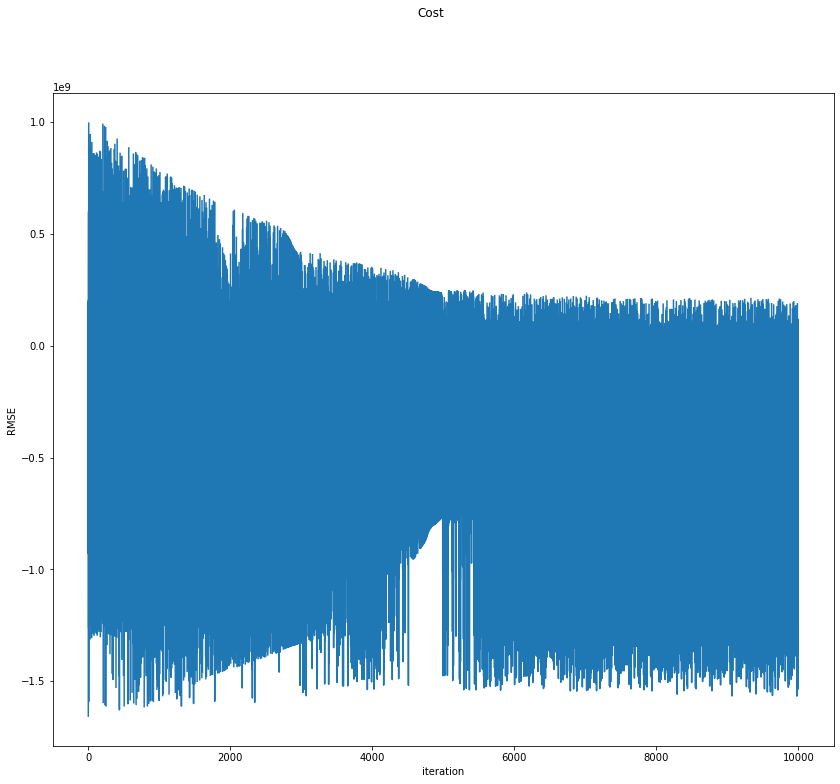

age                             4.413443
education.num                  -7.112192
sex                           -18.492446
hours.per.week                  3.861788
white                          11.701211
black                          18.011238
Married-AF-spouse              -0.419312
Married-civ-spouse            -64.665480
Married-spouse-absent           5.152282
Never-married                  50.736620
Separated                       8.064612
Widowed                         5.384472
Armed-Forces                    0.000000
Craft-repair                   12.715398
Exec-managerial               -34.222747
Farming-fishing                11.306761
Handlers-cleaners              15.487667
Machine-op-inspct              14.495079
Other-service                  22.893246
Priv-house-serv                 2.930217
Prof-specialty                -30.519141
Protective-serv                -2.485563
Sales                          -6.555525
Tech-support                    1.719395
Transport-moving

In [56]:
lg = LogisticRegression(X,y,learningRate = 1e-4, tolerance = 0.5, maxIteration = 10000)
lg.runModel()

In [57]:
pred = lg.predict(X_test)

In [58]:
pred_prob = lg.predictProb(X_test)
y_result = pd.DataFrame(pred_prob)

In [59]:
def performance(y_test, pred):
    print('Recall is {}'.format(metrics.recall_score(y_test,pred)))
    print('Precision is {}'.format(metrics.precision_score(y_test,pred)))
    print('F-1 score is {}'.format(metrics.f1_score(y_test,pred)))
    print('Overall accuracy is {}'.format(metrics.accuracy_score(y_test,pred)))

In [60]:
performance(y_test, pred)

Recall is 0.9994301994301994
Precision is 0.7547036964600039
F-1 score is 0.8599955426788499
Overall accuracy is 0.7543791054113231


Decision Tree

In [61]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [62]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [63]:
df2 = df.copy()

In [64]:
#df2.drop(['age'], axis = 1, inplace = True)
#df2.drop(['education.num'], axis = 1, inplace = True)
df2.drop(['fnlwgt'], axis = 1, inplace = True)
#df2.drop(['hours.per.week'], axis = 1, inplace = True)

In [65]:
#column_to_move = df2.pop("income")
#df2.insert(len(df2.columns), "income", column_to_move)
df2

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [66]:
A = df2.iloc[:, :-1].values
B = df2.iloc[:, -1].values.reshape(-1,1)
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.1, random_state=1)

In [67]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(A_train,B_train)
classifier.print_tree()

X_5 <= Husband ? 0.05993356632255892
 left:X_2 <= 12 ? 0.06707340215313434
  left:X_2 <= 7 ? 0.015872284516732615
    left:X_8 <= 43 ? 0.003841289920215124
        left:<=50K
        right:<=50K
    right:X_0 <= 35 ? 0.020012769421602017
        left:<=50K
        right:<=50K
  right:X_8 <= 30 ? 0.016030432801109384
    left:X_2 <= 14 ? 0.03891908046520143
        left:<=50K
        right:>50K
    right:X_0 <= 29 ? 0.0081625234062766
        left:>50K
        right:>50K
 right:X_5 <= Unmarried ? 0.02636956629451906
  left:X_2 <= 12 ? 0.008606471212285402
    left:X_8 <= 40 ? 0.0015130917381042386
        left:<=50K
        right:<=50K
    right:X_0 <= 29 ? 0.022520806795844783
        left:<=50K
        right:<=50K
  right:X_2 <= 10 ? 0.05685163738613641
    left:X_4 <= Exec-managerial ? 0.02730880410518255
        left:<=50K
        right:<=50K
    right:X_0 <= 25 ? 0.01804442682633356
        left:<=50K
        right:>50K


In [68]:
B_pred = classifier.predict(A_test) 
from sklearn.metrics import accuracy_score
accuracy_score(B_test, B_pred)

0.8042468480424685

Navie Bayes

<AxesSubplot:>

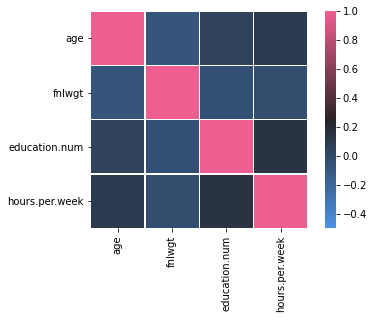

In [69]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [70]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [71]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [72]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [73]:
train, test = train_test_split(df3, test_size=0.01, random_state=1)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="<=50K")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[ 28  52]
 [ 17 205]]
0.8559498956158664


In [74]:
print(accuracy_score(Y_test, Y_pred))

0.7715231788079471


In [75]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [76]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [77]:
df4=df2.copy()
df4.drop('age', axis = 1, inplace = True)
df4.drop('education.num', axis = 1, inplace = True)
df4.drop('hours.per.week', axis = 1, inplace = True)
df4.drop('occupation', axis = 1, inplace = True)
df4.drop('native.country', axis = 1, inplace = True)
df4.drop('marital.status', axis = 1, inplace = True)

In [78]:
df4['white'] = df['race'].apply(Encoding)
df4['black'] =  df['race'].apply(Encoding_black)
df4.drop(['race'], axis = 1, inplace = True)

In [79]:
df4['sex'] = pd.get_dummies(df['sex'], drop_first = True)
df4 = df4.join(pd.get_dummies(df['workclass'], drop_first = True))
df4 = df4.join(pd.get_dummies(df['relationship'], drop_first = True))
df4.drop('workclass', axis = 1, inplace = True)
df4.drop('relationship', axis = 1, inplace = True)
df4['<=50K'] = df['income'].apply(income_one_hot)
df4.drop('income', axis = 1, inplace = True)

In [80]:
df4

,sex,white,black,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
5,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
6,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
32557,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1
32558,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
32559,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1


In [81]:
train, test = train_test_split(df4, test_size=0.05, random_state=1)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="<=50K")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[ 102  289]
 [ 112 1004]]
0.833540888335409


In [82]:
print(accuracy_score(Y_test, Y_pred))

0.7339084273390842
